In [2]:
import numpy as np
csv_path = "mtfuji_data.csv" #specify the file name (path)
np.set_printoptions(suppress=True) #Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


In [3]:
newfj = fuji[135:136,3:4]
newfj1 = fuji[134:135,3:4]
print(newfj)
print(newfj1)
dif = newfj-newfj1
print(dif)

[[3266.24]]
[[3087.81]]
[[178.43]]


<function matplotlib.pyplot.show(close=None, block=None)>

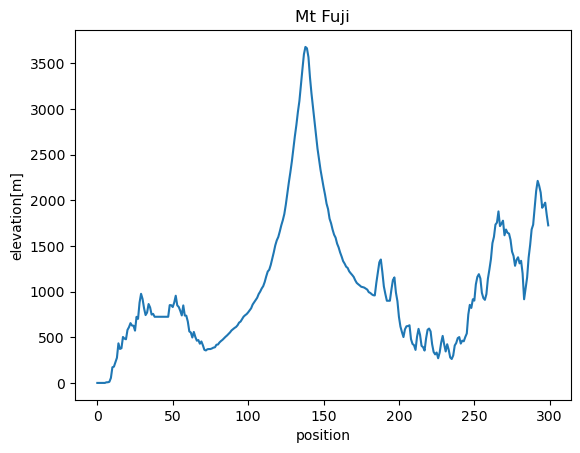

In [4]:
horizontal_ndar = fuji[0:,0:1] #slicing out the number of the point for horizontal axis
#print(horizontal_ndar)
vertical_ndar = fuji[0:,-2:-1] #slicing out the elevation for the vertical axis
#print(vertical_ndar)
#plotting the sliced ndarrays
import matplotlib.pyplot as plt
plt.plot (horizontal_ndar, vertical_ndar)
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt Fuji")
plt.show

In [5]:
#[Problem 2] Create a function to calculate the slope of a point
#function to calculate gradient of a point
def point_gradient(index):
    change_horizontal = fuji[:,0][index] - fuji[:,0][index - 1]
    change_vertical = fuji[:,3][index] - fuji[:,3][index - 1]
    grad = change_vertical/change_horizontal
    return grad
point_gradient(0)

5.77190635451505

In [6]:
#[Problem 3] Create a function to calculate the destination
def point_destination(current_point, alpha, grad):
    destination_point = current_point - alpha * grad
    if(destination_point <= 0):
        return 0
    else:
        return round(destination_point)
alpha = 0.2
current_point = 50
point_destination(current_point, alpha, point_gradient(current_point))

54

In [7]:
#[Problem 4] Creating a function to go down the mountain
def calculate_going_down(current_position_1, alpha_1):
    slope_1 = point_gradient(current_position_1)
    positions = [current_position_1]
    for counter in range(fuji.size):
        current_position_1 = int(point_destination(current_position_1, alpha_1, slope_1))
        if(positions[-1] == current_position_1):
            break
        else:
            positions.append(current_position_1)
    return positions
alpha_2 = 0.2
print(calculate_going_down(100, alpha_2))

[100, 96, 92, 88, 84, 80, 76, 72, 68, 64, 60, 56, 52, 48, 44, 40, 36, 32, 28, 24, 20, 16, 12, 8, 4, 0]


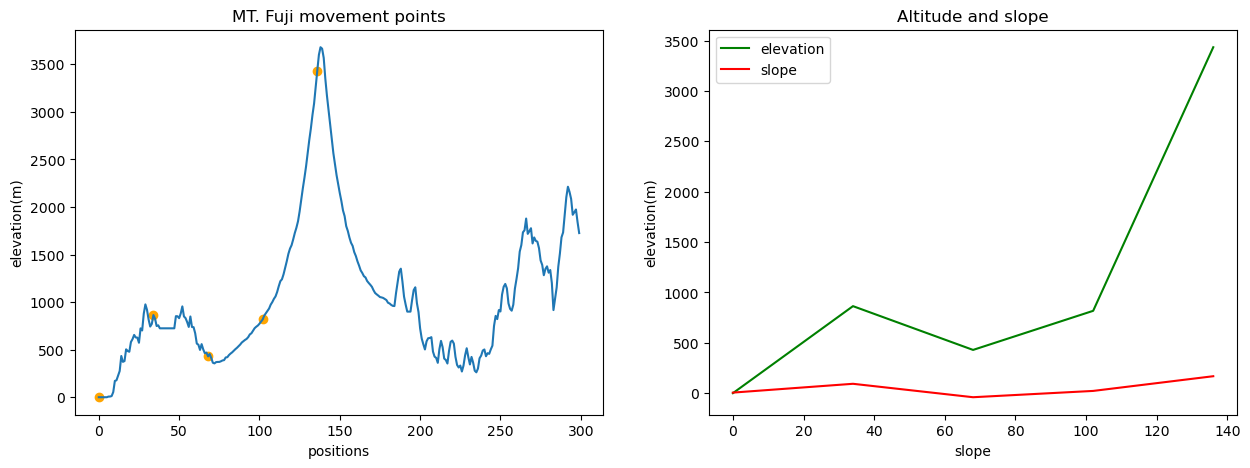

In [8]:
#[Problem 5] Visualization of the descent process
import matplotlib.pyplot as plt
#Display points moved in cross section as dots
positions_array = calculate_going_down(136,alpha_2)
figure = plt.figure(figsize=(15,5))
fig1 = figure.add_subplot(1,2,1)
fig1.set_title("MT. Fuji movement points")
fig1.set_xlabel("positions")
fig1.set_ylabel("elevation(m)")
fig1.plot(fuji[:,0],fuji[:,3])
fig1.scatter(positions_array,[fuji[position_2,3] for position_2 in positions_array],c="orange")
#Make a line graph of the altitude and slope for each iteration
fig2 = figure.add_subplot(1,2,2)
fig2.set_title("Altitude and slope")
fig2.set_xlabel("slope")
fig2.set_ylabel("elevation(m)")
fig2.plot(positions_array,[fuji[position_2,3] for position_2 in positions_array],c="green",label="elevation")
fig2.plot(positions_array, [point_gradient(position_2) for position_2 in positions_array],c="red",label="slope")
fig2.legend()
plt.show()

In [9]:
def display_graph_on_other_points6(points):
    #figure = plt.figure(figsize=(15,5))
    alpha_3 = 0.2
    for point_5 in range(points.size):
        positions_array_6 = calculate_going_down(points[point_5], alpha_3)
    return positions_array_6
input_nd =np.array([20])
display_graph_on_other_points6(input_nd)

[20, 0]

<Figure size 1500x500 with 0 Axes>

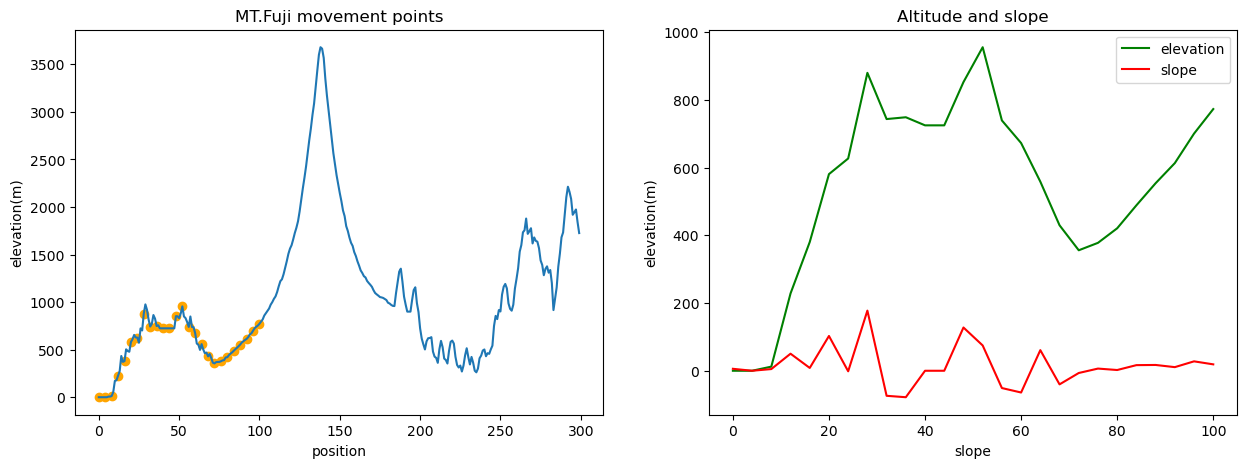

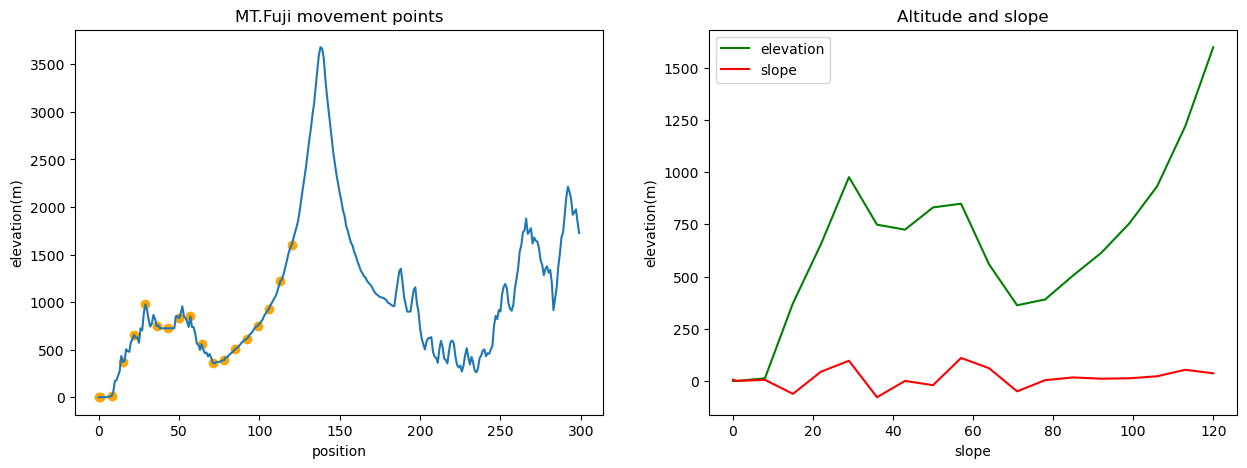

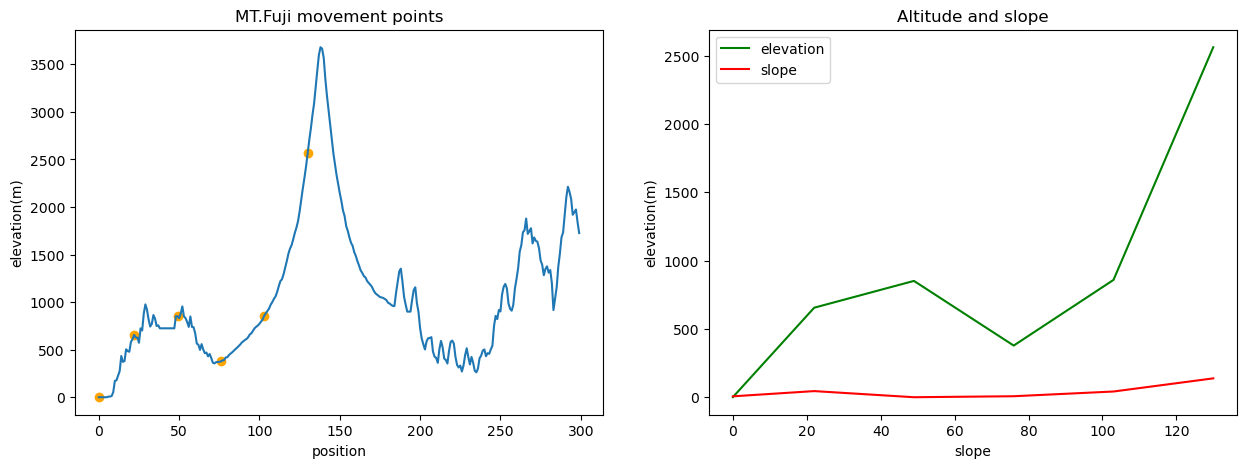

In [10]:
#[Problem 6] Change of initial value & [Problem 7] Visualization of the descent process for each initial value
#Display points moved in cross section as dots on other points
def display_graph_on_other_points(points):
    figure = plt.figure(figsize=(15,5))
    alpha_3 = 0.2
    for point_5 in range(points.size):
        positions_array_1 = calculate_going_down(points[point_5], alpha_3)
        figure = plt.figure(figsize=(15,5))
        fig1 = figure.add_subplot(1,2,1)
        fig1.set_title("MT.Fuji movement points")
        fig1.set_xlabel("position")
        fig1.set_ylabel("elevation(m)")
        fig1.plot(fuji[:,0],fuji[:,3])
        fig1.scatter(positions_array_1,[fuji[position_2,3] for position_2 in positions_array_1],c="orange")
        #Make a line graph of the altitude and slope for each iteration
        fig2 = figure.add_subplot(1,2,2)
        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("slope")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_array_1,[fuji[position_2,3] for position_2 in positions_array_1],c="green",label="elevation")
        fig2.plot(positions_array_1,[point_gradient(position_2) for position_2 in positions_array_1],c="red",label="slope")
        fig2.legend()
        plt.show()
points = np.array([100,120,130])
display_graph_on_other_points(points)

<Figure size 1500x500 with 0 Axes>

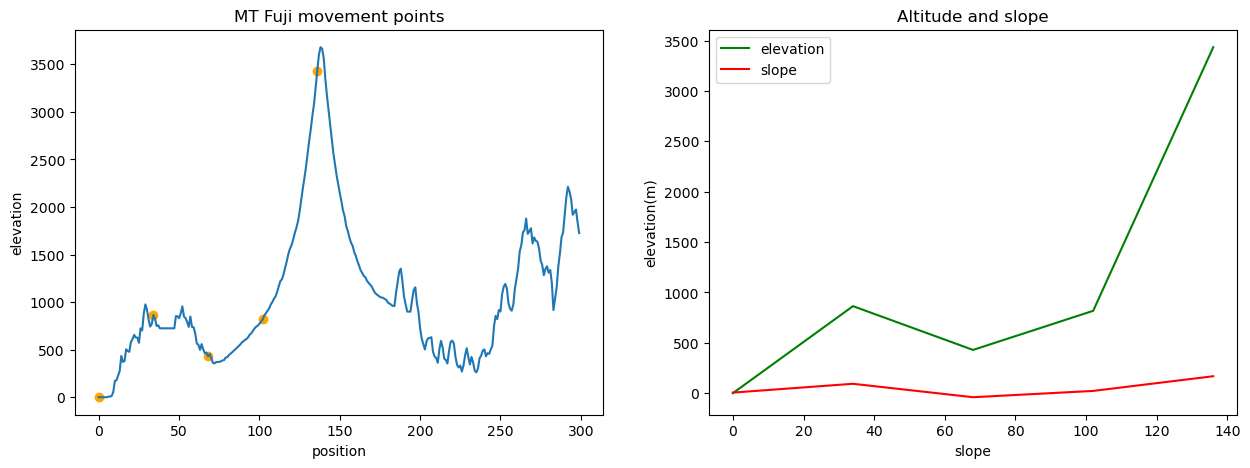

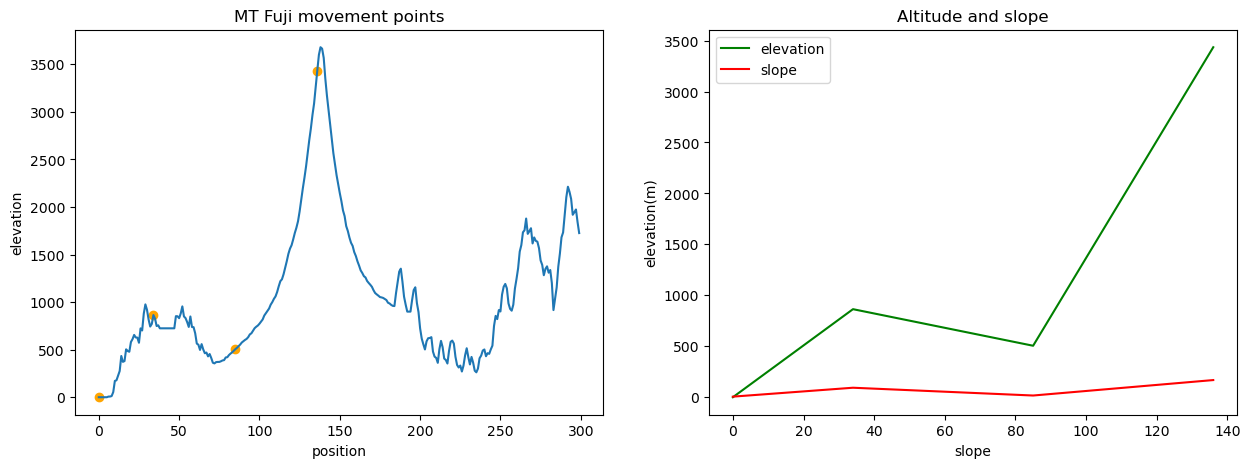

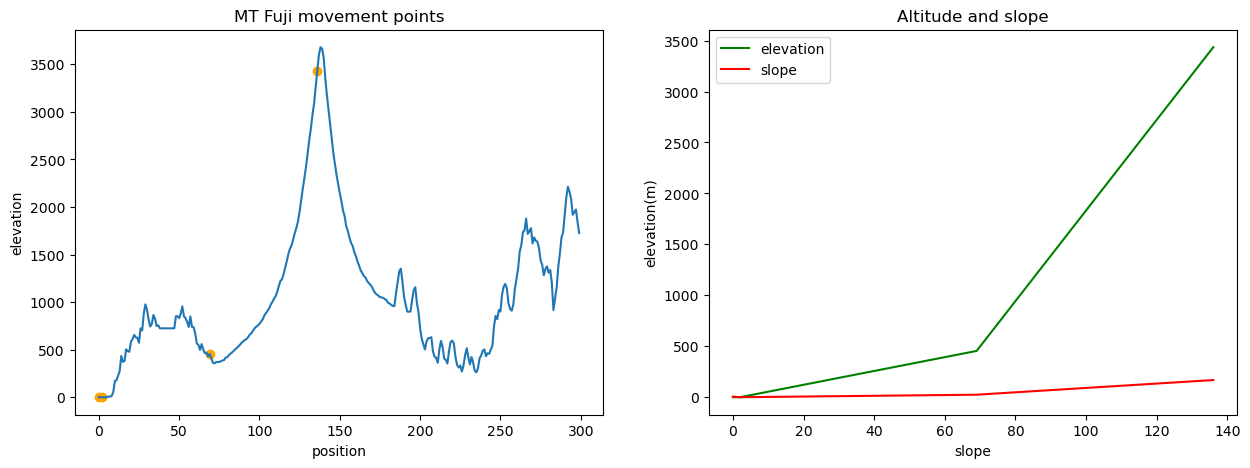

In [11]:
#[Problem 8] (Advance problem) Hyperparameter change
def display_graph_alpha_values(alphas):
    figure = plt.figure(figsize=(15,5))
    for point_6 in range(alphas.size):
        positions_array_1 = calculate_going_down(136, alphas[point_6])
        figure = plt.figure(figsize=(15,5))
        fig1 = figure.add_subplot(1,2,1)
        fig1.set_title("MT Fuji movement points")
        fig1.set_xlabel("position")
        fig1.set_ylabel("elevation")
        fig1.plot(fuji[:,0],fuji[:,3])
        fig1.scatter(positions_array_1,[fuji[position_2,3] for position_2 in positions_array_1],c="orange")
        #Make a line graph of the altitude and slope for each iteration
        fig2 = figure.add_subplot(1,2,2)
        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("slope")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_array_1,[fuji[position_2,3] for position_2 in positions_array_1],c="green",label="elevation")
        fig2.plot(positions_array_1,[point_gradient(position_2) for position_2 in positions_array_1],c="red",label="slope")
        fig2.legend()
        plt.show()
alphas_1 = np.array([0.2,0.3,0.4])
display_graph_alpha_values(alphas_1)